In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Preprocessing and Normalizing Data

In [20]:
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows, cols, 1)

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Defining LeNet-5 Model

In [21]:
def build_lenet(input_shape):
    # Define Sequential Model
    model = tf.keras.Sequential()

    # C1 Convolution Layer
    model.add(
        tf.keras.layers.Conv2D(
            filters=6,
            strides=(1, 1),
            kernel_size=(5, 5),
            activation="tanh",
            input_shape=input_shape,
        )
    )

    # S2 SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # C3 Convolution Layer
    model.add(
        tf.keras.layers.Conv2D(
            filters=6, strides=(1, 1), kernel_size=(5, 5), activation="tanh"
        )
    )

    # S4 SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # C5 Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=120, activation="tanh"))

    # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
    model.add(tf.keras.layers.Flatten())

    # FC6 Fully Connected Layers
    model.add(tf.keras.layers.Dense(units=84, activation="tanh"))

    # Output Layer
    model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

    # Compile the Model
    model.compile(
        loss="categorical_crossentropy",
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, decay=0.0),
        metrics=["accuracy"],
    )

    return model

## Evaluate Model and Visualize Process

Epoch 1/10


/Users/nabijade/Desktop/Repositories/FirstCNNModel/.venv11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/nabijade/Desktop/Repositories/FirstCNNModel/.venv11/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8772 - loss: 0.4321
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9451 - loss: 0.1858
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9600 - loss: 0.1351
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9672 - loss: 0.1089
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9720 - loss: 0.0921
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9756 - loss: 0.0811
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9785 - loss: 0.0716
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9808 - loss: 0.0650
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9825 - loss: 0.0596
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9837 - loss: 0.0548
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9808 - loss: 0.0586
Accuracy :  0.9807999730110168
Training Data (60000, 28, 28) (60000, 10)
Te

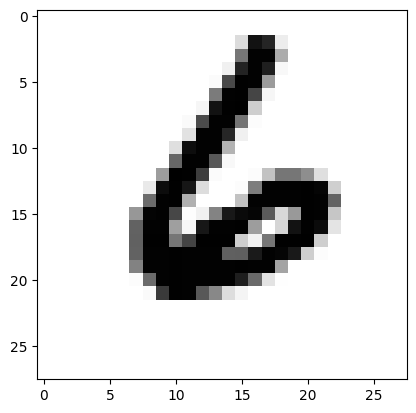

In [ ]:
lenet = build_lenet(input_shape)

# We will be allowing 10 itterations to happen
epochs = 10
history = lenet.fit(
    x_train, y_train, epochs=epochs, batch_size=128, verbose=1
)  # verbose means progress bar

# Check Accuracy of the Model
loss, acc = lenet.evaluate(x_test, y_test)
print("Accuracy : ", acc)

x_train = x_train.reshape(x_train.shape[0], 28, 28)
print("Training Data", x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print("Test Data", x_test.shape, y_test.shape)

# Plot the Image
image_index = 8888
plt.imshow(x_test[image_index].reshape(28, 28), cmap="Greys")

# Make Prediction
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))
print(pred.argmax())

In [23]:
import tensorflow as tf
import numpy as np

# Suppose your model expects 28x28 grayscale images
rows, cols = 28, 28
num_classes = 10  # digits 0-9

# Create a random batch of 100 "images"
x_random = np.random.rand(100, rows, cols, 1).astype(np.float32)

# Create random labels (one-hot encoded)
y_random = tf.keras.utils.to_categorical(
    np.random.randint(0, num_classes, 100), num_classes
)

# Assume you have a CNN model called 'lenet'
# Compile the model if you haven't already
lenet.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Train the model on random data (just to see it run)
history = lenet.fit(x_random, y_random, epochs=1, batch_size=16)

# Evaluate on another batch of random data
x_test_random = np.random.rand(20, rows, cols, 1).astype(np.float32)
y_test_random = tf.keras.utils.to_categorical(
    np.random.randint(0, num_classes, 20), num_classes
)

loss, acc = lenet.evaluate(x_test_random, y_test_random)
print("Random Data Accuracy:", acc)

# Make a prediction
sample_image = np.random.rand(1, rows, cols, 1).astype(np.float32)
pred = lenet.predict(sample_image)
print("Predicted digit (random):", pred.argmax())


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0900 - loss: 7.3129  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0500 - loss: 3.7543
Random Data Accuracy: 0.05000000074505806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted digit (random): 7
